Predict students' grades based on the time spent on preparation. Analytical solution.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read data:

In [36]:
data = pd.read_csv('student_scores.csv')
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values

Data visualization:

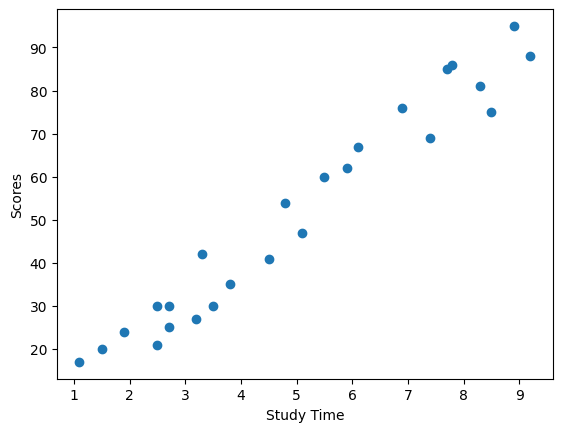

In [37]:
plt.scatter(X, y)
plt.xlabel('Study Time')
plt.ylabel('Scores')
plt.show()

Add column with ones:

In [38]:
X = np.concatenate((np.ones((len(X), 1)), X), axis=1)

Setting parameters:

In [39]:
alpha = 0.01 # learning rate
E = 1000 # number of iterations
B = 5 # determines the number of samples to use for each iteration of sgd

num_samples = len(X)
num_batches = num_samples // B
w = np.zeros(X.shape[1])  # weights

SGD:

In [40]:
for epoch in range(E):
    for batch in range(num_batches):
        i = np.random.choice(num_samples, B, replace=False) # randomly select a fixed number of rows
        X_batch = X[i]
        y_batch = y[i]
        f = X_batch.dot(w) #calculate prediction
        err = f - y_batch # calculate error
        grad = 2 * X_batch.T.dot(err) / B # calculate gradient

        w -= alpha * grad # update weights

Result visualization:

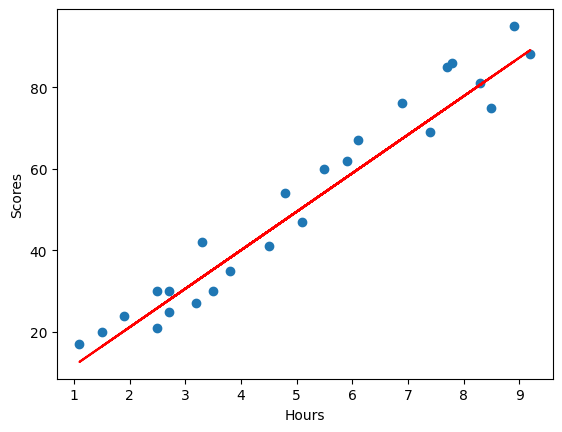

In [41]:
plt.scatter(X[:, 1], y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X[:, 1], X.dot(w), color='red')
plt.show()

Prediction:

In [42]:
X_new = np.array([[4]]) # new value
X_new_with_ones = np.concatenate((np.ones((len(X_new), 1)), X_new), axis=1)
y_pred = X_new_with_ones.dot(w)
print('Predicted score:', y_pred)

Predicted score: [40.01607358]


MSE:

In [43]:
y_pred = X.dot(w)
mse = np.mean((y - y_pred) ** 2)
print(f'MSE: {mse:.4f}')

MSE: 33.2565
